In [2]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date1='ut20160811'
obs_date2='ut20160922'
obj_name='Wasp52'

midtime1=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
midtime2=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path1='/Volumes/ermay_ext/Magellan/'+obs_date1+'/'
path2='/Volumes/ermay_ext/Magellan/'+obs_date2+'/'

#data_path=path+obj_name+'_Spec/'      #path to where your data is saved
#flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
#DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
#FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
#WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH1=path1+'SaveData_'+obj_name+'/'
SAVEPATH2=path2+'SaveData_'+obj_name+'/'

#wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


In [10]:
import pickle

W52=pickle.load(open(SAVEPATH1+'PLOTS/models/wasp52b.pickle'))
W52_spec=W52['spectra']
Tetal_rads=(((W52_spec['data_1'])['high'])['depth'])**(1./2.)
Tetal_errs=(((W52_spec['data_1'])['high'])['error'])
Tetal_errs=(0.5*Tetal_rads**(-1./2.))*Tetal_errs

Tetal_wavs=((W52_spec['data_1'])['high'])['wavelength']*10000.
Tetal_widt=((W52_spec['data_1'])['high'])['width']

Letal_wavs=np.linspace(4125,8625,19)
Letal_rads=np.array([0.1643,0.1632,0.1656,0.1641,0.1629,0.1619,0.1641,0.1639,0.1638,0.1640,0.1630,0.1645,0.1646,0.1652,0.1651,0.1660,0.1658,0.1664,0.1675])
Letal_errs=np.array([14,13,12,10,9,8,11,10,7,9,6,7,8,8,8,6,7,16,16])/10000.

Cetal_wavs=np.array([5306,5471,5636,5800,5891,5981,6147,6312,6477,6642,6807,6972,7137,7302,7467,7665,7682,7699,7790,7955,8120,8285,8450,8615,8780,8945])
Cetal_widt=np.array([165,165,165,165,16,165,165,165,165,165,165,165,165,165,165,16,18,16,165,165,165,165,165,165,165,165])
Cetal_rads=np.array([0.1624,0.1624,0.1608,0.1588,0.1717,0.1596,0.1610,0.1611,0.1604,0.1616,0.1617,0.1635,0.1613,0.1614,0.1608,0.1651,0.1608,0.1626,0.1623,0.1595,0.1609,0.1598,0.1609,0.1599,0.1612,0.1606])
Cetal_errs=np.array([15,16,19,11,30,16,9,8,8,7,11,12,11,11,9,20,21,21,11,11,12,10,12,16,16,16])/10000.

Cetal_rads+=0.004

(4000, 8000)

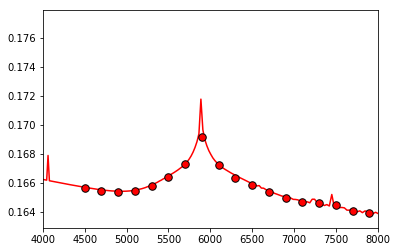

In [9]:
start=4400
end=8000
width=200

R=4
P=30

from Binning_Model import BinFunc
from scipy.interpolate import interp1d


exo_w=np.genfromtxt(SAVEPATH1+'PLOTS/models/W52_noK.dat',usecols=[0],skip_header=1)*10**10.
exo_d=(np.genfromtxt(SAVEPATH1+'PLOTS/models/W52_noK.dat',usecols=[1],skip_header=1)/100.)**(1./2.)

exo_w_R=np.empty([len(exo_w)/R])
exo_d_R=np.empty([len(exo_d)/R])

exo_w_P=np.empty([len(exo_w)/P])
exo_d_P=np.empty([len(exo_d)/P])

new_wave=np.linspace(start,end,(end-start)*10)
func=interp1d(exo_w,exo_d)
new_counts=func(new_wave)


z=0
for w in range(0,len(exo_w_R)):
    exo_w_R[w]=np.nanmedian(exo_w[z:z+R])
    exo_d_R[w]=np.nanmedian(exo_d[z:z+R])
    z+=R
    
z=0
for w in range(0,len(exo_w_P)):
    exo_w_P[w]=np.nanmedian(exo_w[z:z+P])
    exo_d_P[w]=np.nanmedian(exo_d[z:z+P])
    z+=P

#exo_w_P,exo_d_P=BinFunc(exo_d,exo_w,start,end,width)
exo_w_P,exo_d_P=BinFunc(new_counts,new_wave,start,end,width)

plt.clf()
plt.cla()
plt.plot(exo_w_R,exo_d_R,color='red')
plt.plot(exo_w_P,exo_d_P,'.',markerfacecolor='red',markeredgecolor='black',markersize=15)
plt.xlim(4000,8000)
#plt.ylim(0.14,0.18)

In [8]:
def ComNights(x,dx,y,dy):
    d=np.zeros_like(x)
    dd=np.zeros_like(x)
    for i in range(0,len(d)):
        d[i]=np.nansum([x[i]/dx[i]**2.,y[i]/dy[i]**2.])/np.nansum([1./dx[i]**2.,1./dy[i]**2.])
        dd[i]=1./np.nansum([1./dx[i]**2.,1./dy[i]**2.])
    return d,dd

[             nan   1.13993264e-04   9.60425194e-05   8.45071696e-05
   8.19859407e-05   8.00320298e-05   8.00302531e-05   7.94161867e-05
   7.96446104e-05   7.97444105e-05   8.00198595e-05   9.81855720e-05
   8.66048130e-05   8.12523465e-05   8.27934629e-05   8.45935850e-05
   9.39280451e-05   8.88887733e-05]
[             nan   5.88925169e-05   9.21486603e-05   7.46151765e-05
   7.27695400e-05   7.10588074e-05   7.13116589e-05   7.05212017e-05
   7.06898899e-05   7.07682695e-05   7.11064006e-05   8.79014510e-05
   7.58808622e-05   7.14868449e-05   7.29668534e-05   7.56779357e-05
   8.08697295e-05   7.74109556e-05]


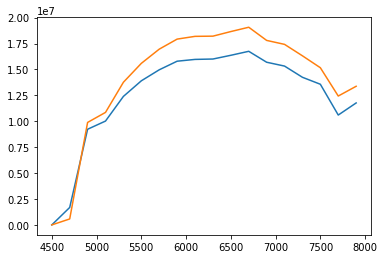

In [9]:
t1=np.load(SAVEPATH1+'Binned_Data_200.npz')['bin_counts']
t2=np.load(SAVEPATH2+'Binned_Data_200.npz')['bin_counts']

bin_ctr_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']
bin_ctr_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['bin_ctr']

t1=np.nanmedian(t1,axis=0)
t2=np.nanmedian(t2,axis=0)


plt.plot(bin_ctr_200_1,t1[:,0])
plt.plot(bin_ctr_200_2,t2[:,0])

errs_1=np.sqrt(t1[:,0])/(t1[:,3]+t1[:,5]+t1[:,8])
errs_2=np.sqrt(t2[:,0])/(t2[:,3]+t2[:,5]+t2[:,8])

print errs_1
print errs_2

In [10]:
print len(dt_e_t_200_2)

18


In [15]:
width=200
em=10**5.



#mfile='HATS8b_1em1S.dat'
#model=(np.genfromtxt(SAVEPATH+mfile,usecols=[1],skip_header=2)/100)**(1./2.)
#mwave=np.genfromtxt(SAVEPATH+mfile,usecols=[0],skip_header=2)*10**10.


from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import os

### night 1

bin_ctr_200_1=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']
dt_e_p_200_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_200.npz')['err_p'],axis=0)
dt_e_t_200_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_200.npz')['err_t'],axis=0)
             
rp_200_1=np.empty([len(bin_ctr_200_1)])
rp_e_200_1=np.empty([len(bin_ctr_200_1)])
rs_e_200_1=np.empty([len(bin_ctr_200_1)])

bin_ctr_1=np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
dt_e_p_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['err_p'],axis=0)
dt_e_t_1=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(width))+'.npz')['err_t'],axis=0)
             
rp_1=np.empty([len(bin_ctr_1)])
rp_e_1=np.empty([len(bin_ctr_1)])
rs_e_1=np.empty([len(bin_ctr_1)])

### night 2

bin_ctr_200_2=np.load(SAVEPATH2+'LC_bins_br_200.npz')['bin_ctr']
dt_e_p_200_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_200.npz')['err_p'],axis=0)
dt_e_t_200_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_200.npz')['err_t'],axis=0)
             
rp_200_2=np.empty([len(bin_ctr_200_2)])
rp_e_200_2=np.empty([len(bin_ctr_200_2)])
rs_e_200_2=np.empty([len(bin_ctr_200_2)])

bin_ctr_2=np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
dt_e_p_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['err_p'],axis=0)
dt_e_t_2=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_'+str(int(width))+'.npz')['err_t'],axis=0)
             
rp_2=np.empty([len(bin_ctr_2)])
rp_e_2=np.empty([len(bin_ctr_2)])
rs_e_2=np.empty([len(bin_ctr_2)])



### color scaling ###
bin_ctr_200=bin_ctr_200_1
bin_ctr=bin_ctr_1

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200),vmax=np.max(bin_ctr_200))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

print len(bin_ctr)

b=0
for file in os.listdir(SAVEPATH1+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_1):
            rbwhite_1=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp_1[b]=(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0])
            rs_e_1[b]=np.abs(np.nanmedian(np.load(SAVEPATH1+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            
            b+=1
            
b=0
for file in os.listdir(SAVEPATH1+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200_1):
            rbwhite_200_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[2]
        else:
            rp_200_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[2]
            rp_e_200_1[b]=np.nanmedian((np.load(SAVEPATH1+'Fits_200/'+file)['paramserr'])[0])
            rs_e_200_1[b]=np.abs(np.nanmedian(np.load(SAVEPATH1+'Fits_200/'+file)['residuals']))*10**-6

            b+=1
            
            
b=0
for file in os.listdir(SAVEPATH2+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_2):
            rbwhite_2=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp_2[b]=(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['paramserr'])[0])
            rs_e_2[b]=np.abs(np.nanmedian(np.load(SAVEPATH2+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            
            b+=1
            
b=0
for file in os.listdir(SAVEPATH2+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200_2):
            rbwhite_200_2=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[2]
        else:
            rp_200_2[b]=(np.load(SAVEPATH2+'Fits_200/'+file)['params'])[2]
            rp_e_200_2[b]=np.nanmedian((np.load(SAVEPATH2+'Fits_200/'+file)['paramserr'])[0])
            rs_e_200_2[b]=np.abs(np.nanmedian(np.load(SAVEPATH2+'Fits_200/'+file)['residuals']))*10**-6

            b+=1
            
rp_200_2=np.array([np.nan,np.nan,np.nan,0.16400663,0.16400682,0.16433666,0.16279064,0.16440017,0.16286515,0.1619866,0.16220124,0.16246947,0.1637653,0.16453743,0.16465737,0.1647974,0.16184742,0.16327294])
rp_200_1[0]=np.nan
rp_200_1[1]=np.nan


owave=np.logspace(4000,9000,1000)



nanarr=np.array([np.nan])

#rp_200_2=np.append(np.append(nanarr,rp_200_2),nanarr)
#rs_e_200_2=np.append(np.append(nanarr,rs_e_200_2),nanarr)
#rp_e_200_2=np.append(np.append(nanarr,rp_e_200_2),nanarr)
#dt_e_t_200_2=np.append(np.append(nanarr,dt_e_t_200_2),nanarr)

rs_e_200_1=errs_1
rs_e_200_2=errs_2

#n1_te_200=np.sqrt(rp_e_200_1**2.+rs_e_200_1**2.+dt_e_t_200_1**2.)
#n2_te_200=np.sqrt(rp_e_200_2**2.+rs_e_200_2**2.+dt_e_t_200_2**2.)


print rp_200_1
print rp_200_2

#print n1_te_200
#print n2_te_200

print '*****'


rp_200,te_200=ComNights(rp_200_1,10.*errs_1,rp_200_2,10.*errs_2)
print rp_200
print te_200

print '*****'

#rp,te=ComNights(rp_1,2.*errs_1,rp_2,2.*errs_2)

#rp_2=np.append(np.append(nanarr,rp_2),nanarr)
#rs_e_2=np.append(np.append(nanarr,rs_e_2),nanarr)
#rp_e_2=np.append(np.append(nanarr,rp_e_2),nanarr)
#dt_e_t_2=np.append(np.append(nanarr,dt_e_t_2),nanarr)

#n1_te=np.sqrt(rp_e_1**2.+rs_e_1**2.+dt_e_t_1**2.)
#n2_te=np.sqrt(rp_e_2**2.+rs_e_2**2.+dt_e_t_2**2.)#

#rp,te=ComNights(rp_1,n1_te,rp_2,n2_te)

#print rp
#print te


#print rp_e

for b in range(0,len(bin_ctr)):
    print bin_ctr[b], np.round(rp_200_1[b],4),np.round(errs_1[b],6),np.round(rp_200_2[b],4),np.round(errs_2[b],6),np.round(rp_200[b],4),np.round(te_200[b],6)



18
[        nan         nan  0.16599152  0.16490117  0.16375088  0.16789626
  0.17111647  0.16870845  0.16492852  0.17412169  0.16216139  0.16291494
  0.16067511  0.16535523  0.16556456  0.16012399  0.16454843  0.16617349]
[        nan         nan         nan  0.16400663  0.16400682  0.16433666
  0.16279064  0.16440017  0.16286515  0.1619866   0.16220124  0.16246947
  0.1637653   0.16453743  0.16465737  0.1647974   0.16184742  0.16327294]
*****
[        nan  0.          0.0795627   0.16439851  0.16389404  0.1659058
  0.1664755   0.16629962  0.16377437  0.16733301  0.16218366  0.16266766
  0.16242327  0.16489426  0.16505396  0.16271987  0.16299726  0.16452397]
[             inf   2.73763217e-07   4.42130746e-07   3.12848416e-07
   2.96195418e-07   2.82350212e-07   2.83466730e-07   2.78062101e-07
   2.79512936e-07   2.80168696e-07   2.82523737e-07   4.28904736e-07
   3.25732255e-07   2.88058981e-07   2.99664007e-07   3.18118435e-07
   3.75581108e-07   3.40785966e-07]
*****
4500.0 nan nan

[ 4500.  4700.  4900.  5100.  5300.  5500.  5700.  5900.  6100.  6300.
  6500.  6700.  6900.  7100.  7300.  7500.  7700.  7900.]


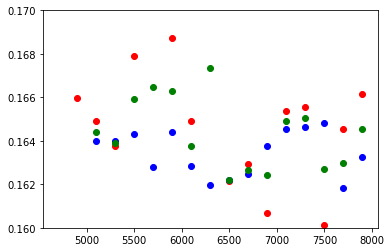

In [41]:
print bin_ctr

plt.plot(bin_ctr,rp_200_1,'.',markersize=12,color='red')
plt.plot(bin_ctr,rp_200_2,'.',markersize=12,color='blue')
plt.plot(bin_ctr,rp_200,'.',markersize=12,color='green')
plt.ylim(0.16,0.17)

plt.show()

In [72]:
print em

100000.0


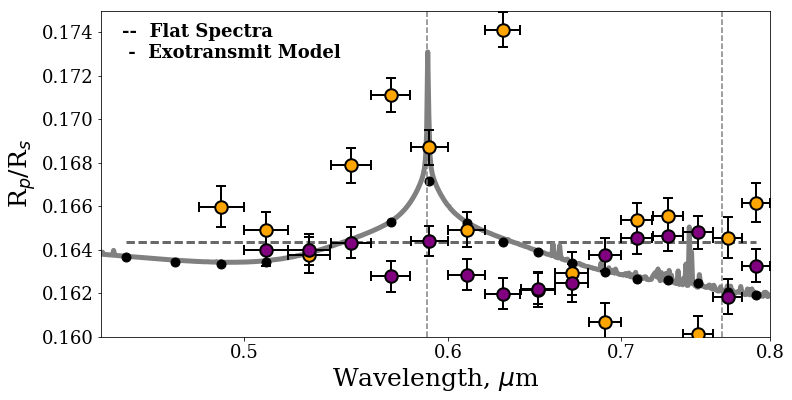

In [74]:
em=10

wavelog=np.log(bin_ctr)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))


rp_200_n=rp_200[~np.isnan(rp_200)]
wavelog_n=wavelog[~np.isnan(rp_200)]
lins=np.polyfit(wavelog_n[2:],rp_200_n[2:],0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
#Rs=6.4*10**10.
#Tplan=1600.   #temperature of planet in K
#gplan=1707.   # gravity in cm/s^2

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

#xerr1=np.zeros_like(bin_ctr)
#xerr2=np.zeros_like(bin_ctr)
xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
plt.plot(wavelog,lin,color='dimgrey',linewidth=3.0,linestyle='--')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d-0.002,color='gray',linewidth=5.0)
plt.plot(np.log(exo_w_P),exo_d_P-0.002,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(mwave),model,color='dimgrey',linewidth=2.0,linestyle='--')


plt.plot(np.log(bin_ctr_200),rp_200_1,'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', color='orange',zorder=11)
plt.errorbar(np.log(bin_ctr_200),rp_200_1,yerr=em*(errs_1),xerr=xerr2,ecolor='black',fmt='None',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)

plt.plot(np.log(bin_ctr_200),rp_200_2,'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', color='purple',zorder=11)
plt.errorbar(np.log(bin_ctr_200),rp_200_2,yerr=em*(errs_2),xerr=xerr2,ecolor='black',fmt='None',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)

#for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==2 or b==5:
#        continue
    #if b==0 or b==1 or b==2 or b==3 or b==4 or b==5 or b==6 or b==10 or b==11 or b==24 or b==64:# or b==3 or b==11 or b==17:
    #    continue
#    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=em*(te[b]),xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

#for b in range(0,len(bin_ctr_200)):
#    if b==0:# or b==1 or b==3 or b==11 or b==17:
#        continue
#    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
#    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=em*(te_200[b]),xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))
plt.ylim(0.160,0.175)

plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.15,0.82,'--  Flat Spectra', color='black',fontsize=18,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.15,0.77,' -  Exotransmit Model', color='black',fontsize=18,fontproperties=fontb)

#plt.scatter(np.log(4550),0.1693,marker='D',s=100,c='purple')
#plt.figtext(0.185,0.8155, 'Chen et al. (2017)',fontproperties=font,fontsize=15)

#plt.scatter(np.log(4550),0.16845,marker='^',s=100,c='green')
#plt.figtext(0.185,0.75, 'Louden et al. (2017)',fontproperties=font,fontsize=15)

#plt.scatter(np.log(4550),0.1676,marker='o',s=100,c='orange')
#plt.figtext(0.185,0.6845, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
#plt.savefig(SAVEPATH1+'PLOTS/TSpec_bothnights'+str(int(width))+'.eps')    
#plt.savefig(SAVEPATH2+'PLOTS/TSpec_bothnights'+str(int(width))+'.eps')  

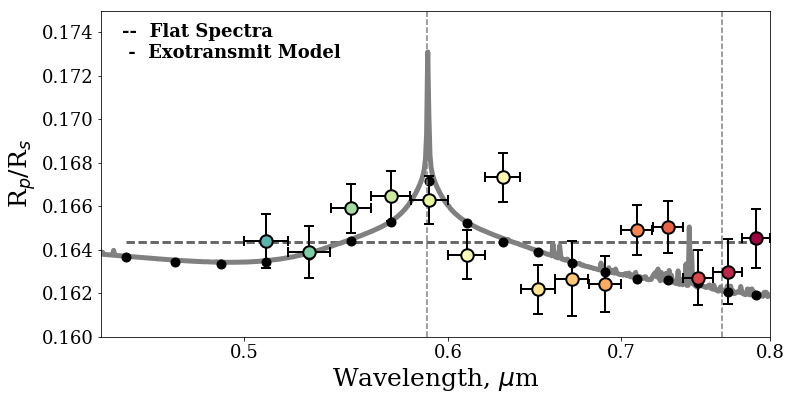

In [69]:
wavelog=np.log(bin_ctr)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))


rp_200_n=rp_200[~np.isnan(rp_200)]
wavelog_n=wavelog[~np.isnan(rp_200)]
lins=np.polyfit(wavelog_n[2:],rp_200_n[2:],0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
#Rs=6.4*10**10.
#Tplan=1600.   #temperature of planet in K
#gplan=1707.   # gravity in cm/s^2

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

#xerr1=np.zeros_like(bin_ctr)
#xerr2=np.zeros_like(bin_ctr)
xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
plt.plot(wavelog,lin,color='dimgrey',linewidth=3.0,linestyle='--')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d-0.002,color='gray',linewidth=5.0)
plt.plot(np.log(exo_w_P),exo_d_P-0.002,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(mwave),model,color='dimgrey',linewidth=2.0,linestyle='--')


#plt.plot(np.log(bin_ctr_200),rp_200,'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', color='orange',zorder=11)
#plt.errorbar(np.log(bin_ctr_200),rp_200,yerr=em*(te_200),xerr=xerr2,ecolor='black',fmt='None',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)

#for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==2 or b==5:
#        continue
    #if b==0 or b==1 or b==2 or b==3 or b==4 or b==5 or b==6 or b==10 or b==11 or b==24 or b==64:# or b==3 or b==11 or b==17:
    #    continue
#    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=em*(te[b]),xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

for b in range(0,len(bin_ctr_200)):
    if b==0:# or b==1 or b==3 or b==11 or b==17:
        continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=em*(te_200[b]),xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))
plt.ylim(0.160,0.175)

plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.15,0.82,'--  Flat Spectra', color='black',fontsize=18,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)
plt.figtext(0.15,0.77,' -  Exotransmit Model', color='black',fontsize=18,fontproperties=fontb)

#plt.scatter(np.log(4550),0.1693,marker='D',s=100,c='purple')
#plt.figtext(0.185,0.8155, 'Chen et al. (2017)',fontproperties=font,fontsize=15)

#plt.scatter(np.log(4550),0.16845,marker='^',s=100,c='green')
#plt.figtext(0.185,0.75, 'Louden et al. (2017)',fontproperties=font,fontsize=15)

#plt.scatter(np.log(4550),0.1676,marker='o',s=100,c='orange')
#plt.figtext(0.185,0.6845, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH1+'PLOTS/TSpec_bothnights'+str(int(width))+'.eps')    
plt.savefig(SAVEPATH2+'PLOTS/TSpec_bothnights'+str(int(width))+'.eps')  

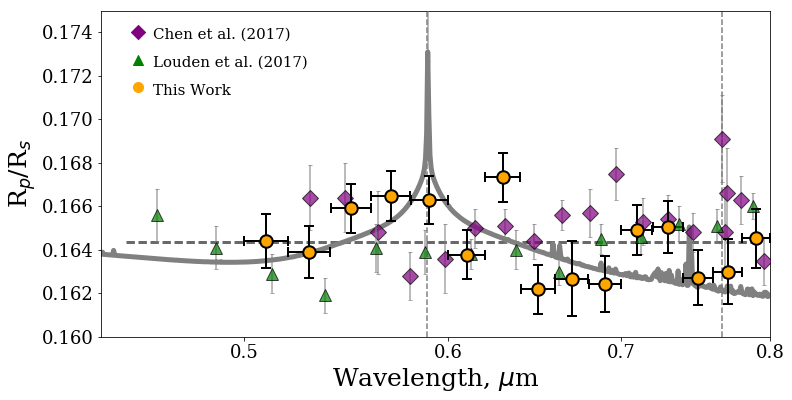

In [66]:
wavelog=np.log(bin_ctr)
rays=np.polyfit(wavelog,rp_200,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))


rp_200_n=rp_200[~np.isnan(rp_200)]
wavelog_n=wavelog[~np.isnan(rp_200)]
lins=np.polyfit(wavelog_n[2:],rp_200_n[2:],0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
#Rs=6.4*10**10.
#Tplan=1600.   #temperature of planet in K
#gplan=1707.   # gravity in cm/s^2

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp_200)**2.)
chi_flat=np.nansum((lin-rp_200)**2.)
chi_act=np.nansum((raya-rp_200)**2.)

#xerr1=np.zeros_like(bin_ctr)
#xerr2=np.zeros_like(bin_ctr)
xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
plt.plot(wavelog,lin,color='dimgrey',linewidth=3.0,linestyle='--')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d-0.002,color='gray',linewidth=5.0)
#plt.plot(np.log(exo_w_P),exo_d_P-0.002,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(mwave),model,color='dimgrey',linewidth=2.0,linestyle='--')

plt.plot(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads,'s',markersize=12,markeredgecolor='black',markerfacecolor='orange',zorder=8,alpha=0.7)
plt.errorbar(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads, yerr=Tetal_errs,zerr=Tetal_widt/2.,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(Letal_wavs),Letal_rads,'^',markersize=12,markeredgecolor='black',markerfacecolor='green',zorder=10,alpha=0.7)
plt.errorbar(np.log(Letal_wavs),Letal_rads, yerr=Letal_errs,zerr=125.*10**(-4.),capsize=2,ecolor='grey',fmt='None',zorder=9,alpha=0.7)

plt.plot(np.log(Cetal_wavs),Cetal_rads,'D',markersize=12,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(Cetal_wavs),Cetal_rads, yerr=Cetal_errs,zerr=Cetal_widt,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(bin_ctr_200),rp_200,'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', color='orange',zorder=11)
plt.errorbar(np.log(bin_ctr_200),rp_200,yerr=em*(te_200),xerr=xerr2,ecolor='black',fmt='None',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)

#for b in range(0,len(bin_ctr)):
#    if b==0 or b==1 or b==2 or b==5:
#        continue
#    #if b==0 or b==1 or b==2 or b==3 or b==4 or b==5 or b==6 or b==10 or b==11 or b==24 or b==64:# or b==3 or b==11 or b==17:
#    #    continue
#    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
#    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=em*(te[b]),xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

#for b in range(0,len(bin_ctr_200)):
#    if b==0:# or b==1 or b==3 or b==11 or b==17:
#        continue
#    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
#   plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=em*(te_200[b]),xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))
plt.ylim(0.16,0.175)

plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)

plt.scatter(np.log(4550),0.1693+0.0047,marker='D',s=100,c='purple')
plt.figtext(0.185,0.8155, 'Chen et al. (2017)',fontproperties=font,fontsize=15)

plt.scatter(np.log(4550),0.16845+0.0043,marker='^',s=100,c='green')
plt.figtext(0.185,0.75, 'Louden et al. (2017)',fontproperties=font,fontsize=15)

plt.scatter(np.log(4550),0.1676+0.0039,marker='o',s=100,c='orange')
plt.figtext(0.185,0.6845, 'This Work',fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH1+'PLOTS/TSpec_alldata_bothnights'+str(int(width))+'.eps')    
plt.savefig(SAVEPATH2+'PLOTS/TSpec_alldata_bothnights'+str(int(width))+'.eps')  

In [77]:
print em*te_200

[        inf  0.00473772  0.          0.00154942  0.00130707  0.00124071
  0.00124149  0.00121504  0.00121856  0.00122091  0.00122907  0.00186369
  0.00140039  0.00121914  0.00127379  0.00134448  0.00158016  0.00144615]


In [59]:
rp_200_n=rp_200[~np.isnan(rp_200)]
wavelog_n=wavelog[~np.isnan(rp_200)]
lins=np.polyfit(wavelog_n[2:],rp_200_n[2:],0)
lin=(np.poly1d(lins))(wavelog)

In [60]:
print rp_200_n
print lins, lin

[ 0.          0.          0.16366697  0.16459078  0.1632091   0.16283775
  0.16441432  0.1643951   0.16397019  0.16395696  0.16329322  0.16477642
  0.16502356  0.16433976  0.16487593  0.16231485  0.16449727]
[ 0.16401081] [ 0.16401081  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081
  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081
  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081  0.16401081]


In [3]:
import os

bin_ctr=np.load(SAVEPATH1+'LC_bins_br_200.npz')['bin_ctr']

c1_1=np.empty([len(bin_ctr)])*np.nan
c2_1=np.empty([len(bin_ctr)])*np.nan

c1_2=np.empty([len(bin_ctr)])*np.nan
c2_2=np.empty([len(bin_ctr)])*np.nan

b=0
for file in os.listdir(SAVEPATH1+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            c1white_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[5]
            c2white_1=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[6]
        else:
            c1_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[5]
            c2_1[b]=(np.load(SAVEPATH1+'Fits_200/'+file)['params'])[6]

            b+=1
            
new_path='/Users/ermay/Desktop/new_fit/'            
for b in range(0,len(bin_ctr)):
    if b>=3:
        filel=np.load(new_path+str(b)+'_LightCurve_batman_fits.npz')
        c1_2[b]=filel['params'][1]
        c2_2[b]=filel['params'][2]
        
print c2_1
print c2_2


[-0.08350446 -0.05492281  0.01661923  0.14798319  0.16718896  0.16836826
  0.14043011  0.13666622  0.1473217   0.10908176  0.10788252  0.10020209
  0.12226275  0.10314122  0.09901051  0.26705064  0.10309879  0.0834643 ]
[        nan         nan         nan  0.02976967  0.07717483  0.10139717
  0.11784652  0.11819533  0.14190773  0.1968065   0.21868975  0.25685622
  0.14378916  0.20877671  0.18939979  0.24078465  0.21256075  0.27610385]


(-0.15, 1.1)

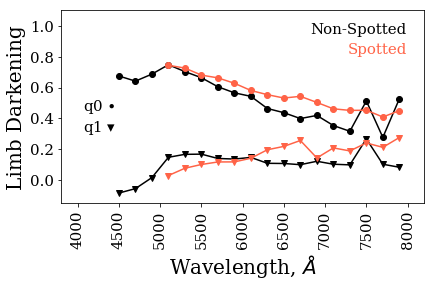

In [4]:
ft_c='tomato'
bins=bin_ctr

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

plt.gcf().subplots_adjust(bottom=0.28,top=0.95,left=0.15,right=0.99)

plt.plot(bins,c1_1,color='black')
plt.plot(bins,c1_2,color=ft_c)
plt.plot(bins,c1_1,'o',color='black')
plt.plot(bins,c1_2,'o',color=ft_c)

plt.plot(bins,c2_1,color='black')
plt.plot(bins,c2_2,color=ft_c)
plt.plot(bins,c2_1,'v',color='black')
plt.plot(bins,c2_2,'v',color=ft_c)

plt.figtext(0.95,0.87,'Non-Spotted',color='black',fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.95,0.80,'Spotted',color=ft_c,fontsize=15,ha='right',fontproperties=font)
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=15,fontproperties=font)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=15,fontproperties=font)

plt.xticks(fontproperties=font,fontsize=15,rotation='vertical')
plt.yticks(fontproperties=font,fontsize=15)

plt.xlabel('Wavelength, $\AA$',fontproperties=font,fontsize=20)
plt.ylabel('Limb Darkening',fontproperties=font,fontsize=20)

plt.xlim(3800,8200)
plt.ylim(-0.15,1.1)

#plt.savefig('/Users/ermay/Documents/GradSchool/Research_Observing/Paper1/plots/limb_dark_act.eps')


In [11]:
print bin_ctr
print c2_1
print c2_2

[ 4500.  4700.  4900.  5100.  5300.  5500.  5700.  5900.  6100.  6300.
  6500.  6700.  6900.  7100.  7300.  7500.  7700.  7900.]
[-0.01376557 -0.08618677 -0.04571982 -0.03320555  0.02278307  0.02543149
  0.03751966  0.04267823  0.05374373  0.06480949  0.09603868  0.09314505
  0.08548939  0.0887328   0.09197575  0.09522922  0.10128097  0.10640556]
[-0.01376557 -0.08618677 -0.04571982  0.02976967  0.07717483  0.10139717
  0.11784652  0.11819533  0.14190773  0.1968065   0.21868975  0.25685622
  0.14378916  0.20877671  0.18939979  0.24078465  0.21256075  0.27610385]
